In [1]:
#Iam Manal Mohamed Alnaseef 
# this is my MVP project in(Video Game Sales)

In [96]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
import patsy
import statsmodels.api as sm



In [97]:
#read my dataset
vgsales=pd.read_csv('vgsales.csv')

In [98]:
vgsales.shape

(16598, 11)

In [99]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [100]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [101]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


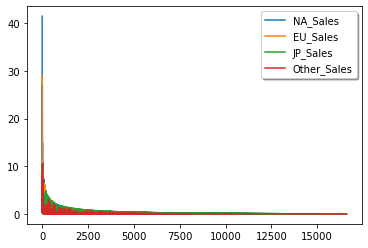

In [155]:
vg_JP= vgsales.JP_Sales
vg_EU= vgsales.EU_Sales
vg_NA= vgsales.NA_Sales
vg_ot= vgsales.Other_Sales


plt.plot(vg_NA)
plt.plot(vg_EU)
plt.plot(vg_JP)
plt.plot(vg_ot)
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],shadow = True, loc = 0);

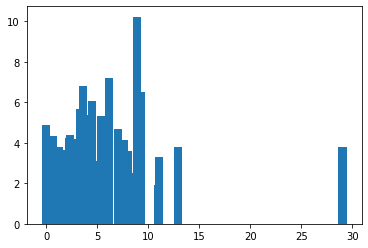

In [145]:
plt.bar(vg_EU,vg_JP);

In [8]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
#check out the NA Value inside the dataset
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# remove the NA Value inside the dataset
vgsales = vgsales.dropna()
vgsales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
# New DataBase without any NA Value
# (16291,11) its new value
vgsales.shape

(16291, 11)

In [146]:
#Q1: Which Game Has Highest Sales in Europ ?
EU_sales_df=vgsales.drop(['NA_Sales','JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
EU_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01


In [13]:
highest_game_sales_inEurop=EU_sales_df.sort_values("EU_Sales",ascending=False)
highest_game_sales_inEurop



,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,11.00
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,9.27
...,...,...,...,...,...,...,...
10672,10674,Crime Crackers,PS,1994.0,Role-Playing,Sony Computer Entertainment,0.00
10671,10673,Sword Art Online: Lost Song,PS3,2015.0,Role-Playing,Namco Bandai Games,0.00
10668,10670,Kiku! Kaku! Kotoba o Fuyasu! Hajimete no Eigo ...,DS,2007.0,Misc,Benesse,0.00
10667,10669,NASCAR '14,PS3,2014.0,Racing,Deep Silver,0.00


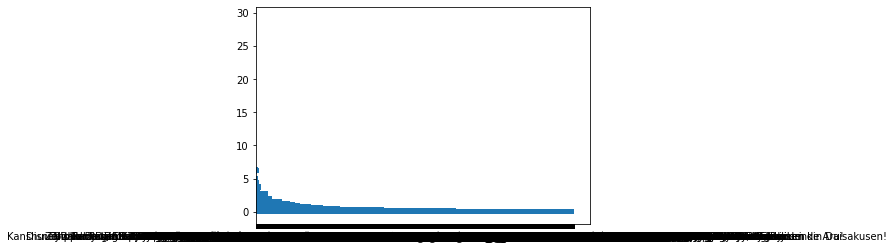

In [157]:
vg_Name=vgsales.Name

plt.barh(vg_EU,vg_Name);

In [14]:
#Q2: do you Genre (Sports) the highest sales?
Sport_Genre_VG=vgsales.query('Genre =="Sports"')
Sport_Genre_VG

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [15]:
Sport_Genre_highest_sales=Sport_Genre_VG.sort_values("Global_Sales",ascending=False)
Sport_Genre_highest_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16179,16182,Sega Golf Club: Miyazato San Kyoudai Naizou,PS3,2006.0,Sports,Sega,0.00,0.00,0.01,0.00,0.01
16218,16221,Family Jockey,Wii,2008.0,Sports,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16226,16229,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01
16258,16261,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.00,0.01,0.00,0.00,0.01


In [16]:
#Q3: where the video Game from publisher (Infogrames) & platform  GC?
Infogrames_VG=vgsales.query('Publisher=="Infogrames"')
Infogrames_VG

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
825,827,Sonic Mega Collection,GC,2002.0,Misc,Infogrames,1.47,0.48,0.05,0.06,2.05
1068,1070,Dragon Ball Z: The Legacy of Goku,GBA,2002.0,Role-Playing,Infogrames,1.52,0.12,0.00,0.05,1.69
2384,2386,Need for Speed: V-Rally,PS,1997.0,Racing,Infogrames,0.43,0.29,0.09,0.06,0.87
2634,2636,Doom,PS,1994.0,Shooter,Infogrames,0.43,0.30,0.00,0.05,0.78
3363,3365,NASCAR Heat 2002,PS2,2001.0,Racing,Infogrames,0.29,0.23,0.00,0.08,0.60
...,...,...,...,...,...,...,...,...,...,...,...
14492,14495,Starshot: Space Circus Fever,N64,1998.0,Platform,Infogrames,0.02,0.01,0.00,0.00,0.03
15502,15505,Hogs of War,PS,2000.0,Strategy,Infogrames,0.01,0.01,0.00,0.00,0.02
15924,15927,RollerCoaster Tycoon: Gold Edition,PC,2002.0,Strategy,Infogrames,0.01,0.00,0.00,0.00,0.02
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01


In [17]:
Game_Infogrames_GC=vgsales.query('Platform=="GC"')
Game_Infogrames_GC

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
107,108,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
110,111,Mario Kart: Double Dash!!,GC,2003.0,Racing,Nintendo,4.12,1.77,0.87,0.19,6.95
135,136,Super Mario Sunshine,GC,2002.0,Platform,Nintendo,4.01,1.26,0.87,0.17,6.31
232,233,The Legend of Zelda: The Wind Waker,GC,2002.0,Action,Nintendo,2.60,0.99,0.89,0.13,4.60
356,357,Luigi's Mansion,GC,2001.0,Action,Nintendo,2.38,0.67,0.46,0.10,3.60
...,...,...,...,...,...,...,...,...,...,...,...
16387,16390,Darkened Skye,GC,2002.0,Adventure,TDK Mediactive,0.01,0.00,0.00,0.00,0.01
16464,16467,Egg Mania: Eggstreme Madness,GC,2002.0,Puzzle,Kemco,0.01,0.00,0.00,0.00,0.01
16475,16478,Space Raiders,GC,2003.0,Shooter,Taito,0.01,0.00,0.00,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01


In [18]:
Game_Infogrames_GC.shape

(542, 11)

In [19]:
#Q4: What is the year with the highest sales?

vgsales.groupby('Year')[['Global_Sales']].max()



,Global_Sales
Year,
1980.0,4.31
1981.0,4.50
1982.0,7.81
1983.0,3.20
1984.0,28.31
1985.0,40.24
1986.0,6.51
1987.0,4.38
1988.0,17.28


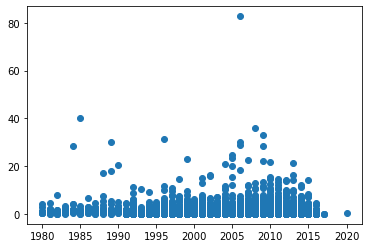

In [160]:
vg_Gl= vgsales.Global_Sales
vg_Year= vgsales.Year
plt.scatter(vg_Year,vg_Gl);

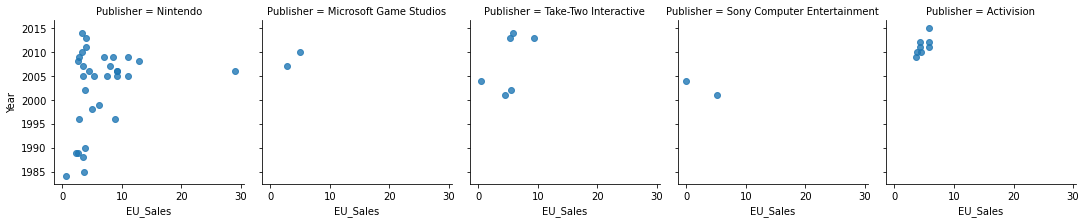

In [20]:
# plot with matplotlib
vgsale=vgsales.head(50)
sns.lmplot(x="EU_Sales", y="Year", col="Publisher", fit_reg=False,
           ci=None, data=vgsale, height=3)

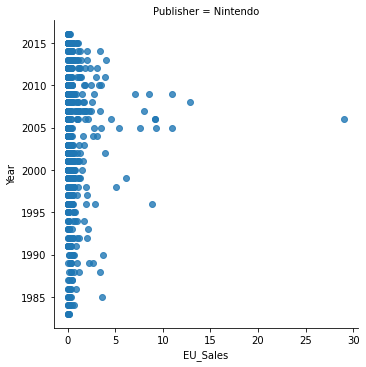

In [21]:
sns.lmplot(
    x="EU_Sales", y="Year", ci=None, fit_reg=False, col="Publisher", data=vgsales.query("Publisher=='Nintendo'"), height=5);

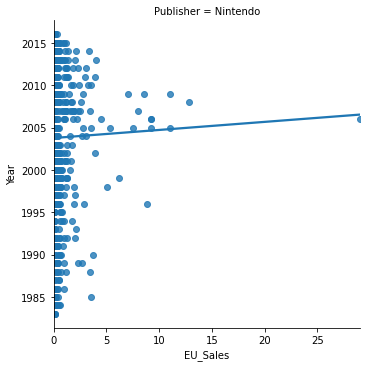

In [15]:
sns.lmplot(
    x="EU_Sales", y="Year", ci=None, col="Publisher", data=vgsales.query("Publisher=='Nintendo'"));

In [ ]:
#Q5: what the predict Global Sales ?
# linear regression

In [22]:
vgsales.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


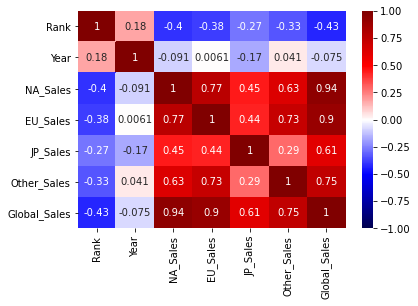

In [17]:
sns.heatmap(vgsales.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

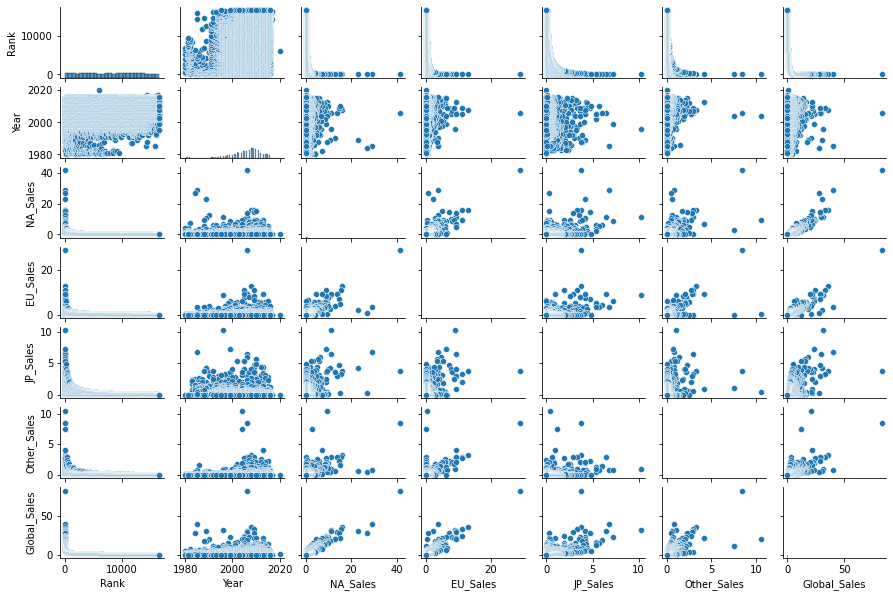

In [19]:
sns.pairplot(vgsales, height=1.2, aspect=1.5)

In [23]:
# Create your feature matrix (X)=Year+NA_Sales + EU_Sales + JP_Sales + Other_Sales' and target vector (y)=Global_Sales
y, X = patsy.dmatrices(' Global_Sales ~NA_Sales + EU_Sales + JP_Sales + Other_Sales',
                       data=vgsales, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.666e+08
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:40:36   Log-Likelihood:                 62488.
No. Observations:               16291   AIC:                        -1.250e+05
Df Residuals:                   16286   BIC:                        -1.249e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0003   4.34e-05      7.312      0.000       0.000       0.000
NA_Sales        1.0000   8.09e-05   1.24e+04      0.000       1.000       1.000
EU_Sales        1.0000      0.000   6860.840      0.000       1.000       1.000
JP_Sales        0.9999      0.000   6693.685      0.000       1.000       1.000
Other_Sales     0.9996      0.000   3133.030      0.000       0.999       1.000
==============================================================================
Omnibus:                      213.175   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.002
Skew:                           0.047   Prob(JB):                     4.12e-84
Kurtosis:                       3.746   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
VGlr = LinearRegression()
VGlr.fit(X,y)
VGlr.score(X,y)

0.9999888947902307

In [25]:
y_pred = VGlr.predict(X)
print(metrics.mean_absolute_error(y, y_pred))

0.002926200447230511
